In [ ]:
# !uv venv zensvi_venv
# !zensvi_venv/bin/activate
# !uv pip install zensvi ipykernel
# !mkdir OpenAmsterdam

In [66]:
7002706 / 280109

24.99993216926268

In [ ]:
from zensvi.download import AMSDownloader

# Remove cache to prevent reloading PIDs from previous query
!rm OpenAmsterdam/cache_zensvi/ -rf

downloader = AMSDownloader()
downloader.download_svi("OpenAmsterdam", lon=4.89, lat=52.37, buffer=1_000)

# Looks like there is a pagination set to return 25 images, and we're only getting the first page
# https://api.data.amsterdam.nl/panorama/panoramas/?page=2

Getting pids: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

Metadata saved to OpenAmsterdam/ams_pids.csv


                                    geometry        lat       lon  \
0  POINT (4.88983139007903 52.3701551899672)  52.370155  4.889831   
1    POINT (4.88973528365289 52.37010122338)  52.370101  4.889735   
2  POINT (4.88978058713309 52.3700735401478)  52.370074  4.889781   
3  POINT (4.88980559243199 52.3701145284659)  52.370115  4.889806   
4  POINT (4.88975563752539 52.3700325520701)  52.370033  4.889756   

                                 pano_id                    timestamp  \
0  TMX7316010203-002931_pano_0003_000035  2023-01-13T08:43:32.985410Z   
1  TMX7316010203-001900_pano_0005_001002  2020-08-31T12:40:13.371500Z   
2  TMX7316010203-002931_pano_0003_000033  2023-01-13T08:43:31.155420Z   
3  TMX7316010203-002931_pano_0003_000034  2023-01-13T08:43:32.070430Z   
4  TMX7316010203-002931_pano_0003_000032  2023-01-13T08:43:30.370440Z   

   mission_year      roll     pitch     heading  
0          2022 -0.393856 -1.378646  198.880312  
1          2020  0.324595 -0.781645  197.75400

<Axes: >

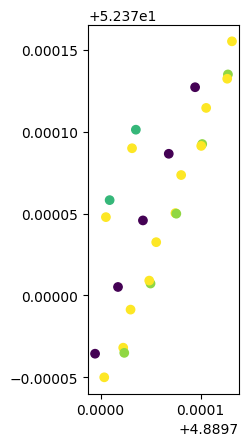

In [72]:
# This was my own attempt at plotting a map
import pandas as pd
import geopandas as gpd
df = pd.read_csv("OpenAmsterdam/ams_pids.csv")
print(df.head())
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat, crs='EPSG:4326'))
gdf.plot(column='mission_year')

In [67]:
# Metadata includes roll, pitch, heading, as well as x, y coords, but not height. While the original API result contains an x,y,z coordinate
# Here, the height is in meters above the reference ellipsoid, WGS84, which is supposedly about 40-50 m above sea level for Amsterdam.

(<Figure size 1000x1000 with 2 Axes>, <Axes: >)

findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not found.
findfont: Font family 'Arial Narrow' not

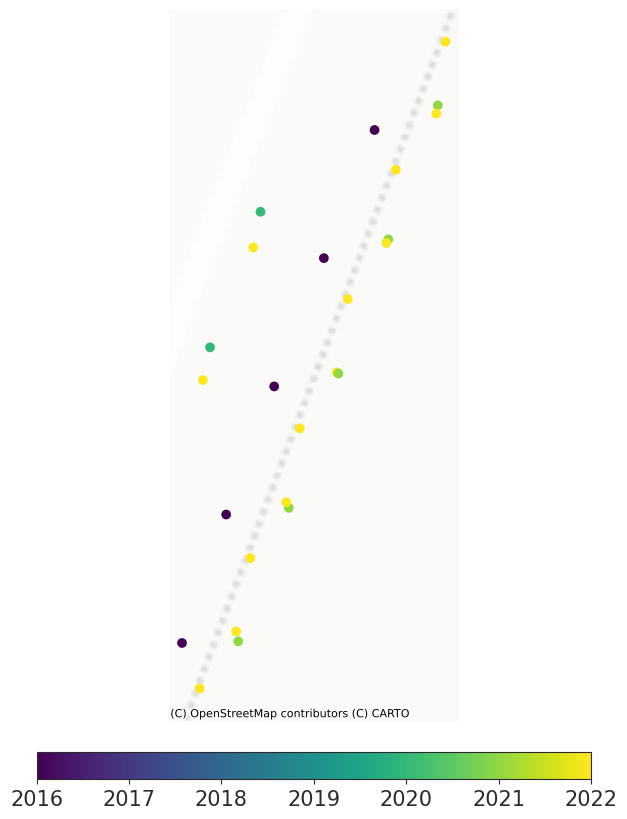

In [ ]:
# ZenSVI also has a map visualization built in

from zensvi.visualization import plot_map

plot_map(path_pid = "OpenAmsterdam/ams_pids.csv", variable_name='mission_year')

(<Figure size 900x900 with 9 Axes>, <Axes: >)

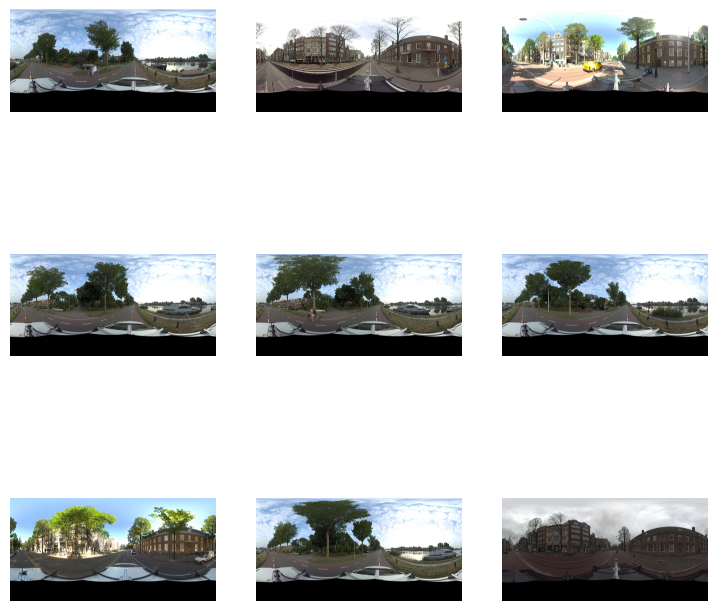

In [76]:
from zensvi.visualization import plot_image

plot_image(dir_image_input='OpenAmsterdam', n_row=3, n_col=3)

In [ ]:
from zensvi.cv import Segmenter

segmenter = Segmenter(dataset='cityscapes', task='semantic')
segmenter.segment('OpenAmsterdam', dir_image_output='OpenAmsterdamSegmentation')

Using GPU


preprocessor_config.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/190M [00:00<?, ?B/s]

Processing outer batches of size 50: 100%|██████████| 1/1 [00:08<00:00,  8.69s/it]


(<Figure size 900x900 with 9 Axes>, <Axes: >)

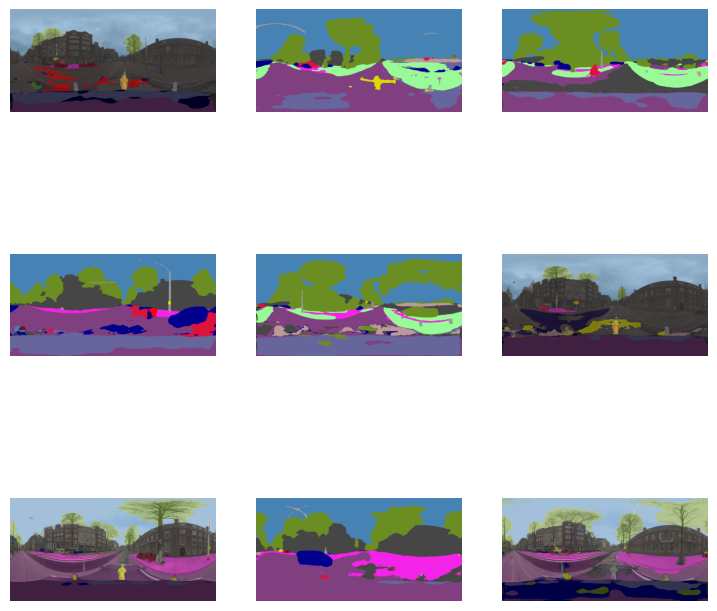

In [77]:
plot_image(dir_image_input='OpenAmsterdamSegmentation', n_row=3, n_col=3)

In [78]:
from zensvi.cv import ObjectDetector

detector = ObjectDetector(text_prompt='building')
detector.detect_objects(dir_input='OpenAmsterdam', dir_image_output='OpenAmsterdamBuildings')

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Using GPU
Found 50 unprocessed images out of 50 total.


Processing images:   0%|          | 0/50 [00:00<?, ?it/s]/home/peter/urban-m4/streetscapes/zensvi_env/lib/python3.11/site-packages/transformers/modeling_utils.py:1072: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/peter/urban-m4/streetscapes/zensvi_env/lib/python3.11/site-packages/groundingdino/models/GroundingDINO/transformer.py:862: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
Processing images: 100%|██████████| 50/50 [00:58<00:00,  1.18s/it]


(<Figure size 900x900 with 9 Axes>, <Axes: >)

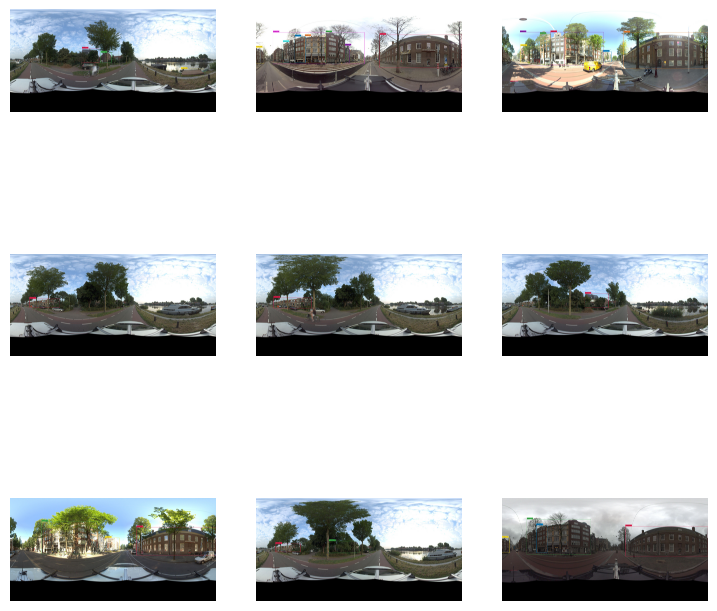

In [79]:
plot_image(dir_image_input='OpenAmsterdamBuildings', n_row=3, n_col=3)

(<Figure size 900x900 with 9 Axes>, <Axes: >)

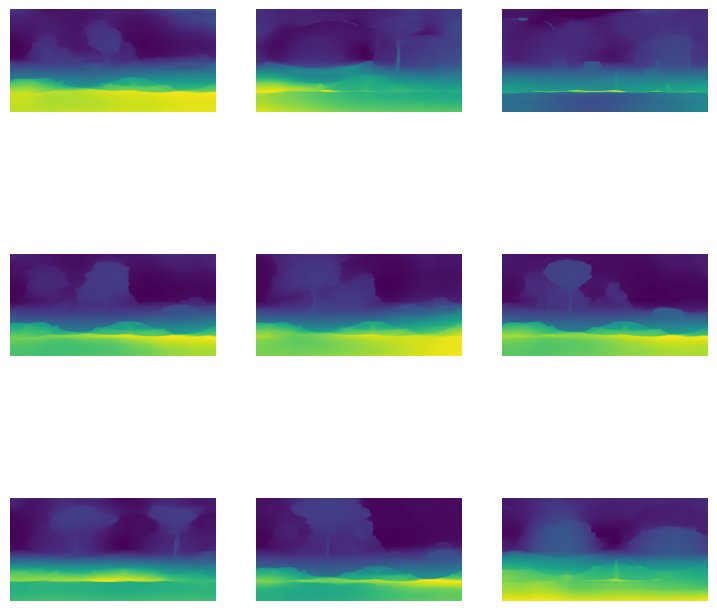

In [ ]:
from zensvi.cv import DepthEstimator

depth_estimator = DepthEstimator(task='relative')

depth_estimator.estimate_depth('OpenAmsterdam', 'OpenAmsterdamDepth')
plot_image(dir_image_input='OpenAmsterdamDepth', n_row=3, n_col=3)

Converting to equidistant_fisheye: 100%|██████████| 50/50 [00:00<00:00, 979.03it/s]


(<Figure size 900x900 with 9 Axes>, <Axes: >)

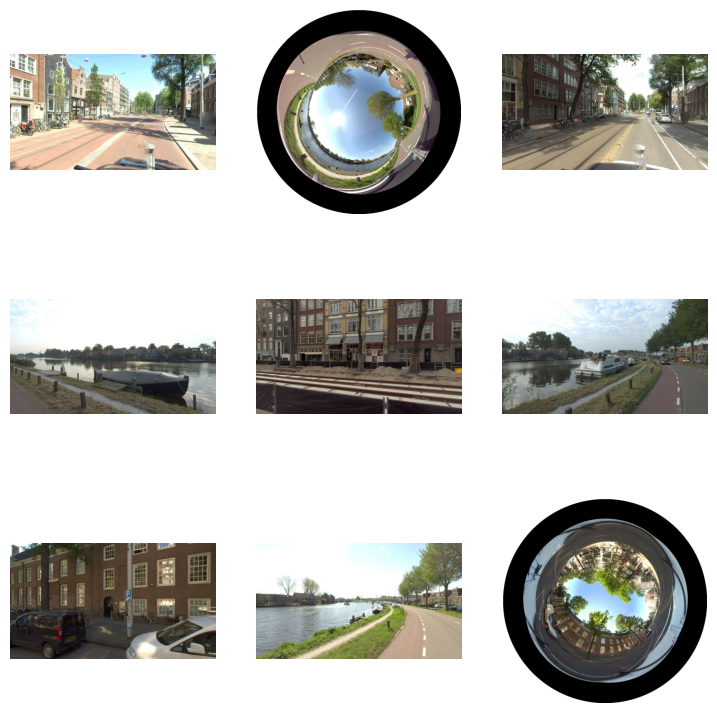

In [88]:
from zensvi.transform import ImageTransformer

image_transformer = ImageTransformer('OpenAmsterdam', 'OpenAmsterdamTransformed')
image_transformer.transform_images('perspective equidistant_fisheye')
plot_image(dir_image_input='OpenAmsterdamTransformed', n_row=3, n_col=3)

In [ ]:
from zensvi.transform import PointCloudProcessor

processor = PointCloudProcessor('OpenAmsterdam', 'OpenAmsterdamDepth')
pcds = processor.process_multiple_images(df.assign(id=df.pano_id)[:5])


[PointCloud with 8000000 points.,
 PointCloud with 8000000 points.,
 PointCloud with 8000000 points.,
 PointCloud with 8000000 points.,
 PointCloud with 8000000 points.]

In [101]:
processor.visualize_point_cloud(pcds[0])

: 